# **Exploration des données**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
file_path = r'C:\Users\hp\Desktop\mental-health.csv'

df = pd.read_csv(file_path)

In [3]:
df.head()

,text,label
0,I recently went through a breakup and she said...,depression
1,"I do not know how to navigate these feelings, ...",depression
2,"So I have been with my bf for 5 months , and h...",depression
3,I am so exhausted of this. Just when I think I...,SuicideWatch
4,I have been severly bullied since i was 5 till...,depression


In [4]:
df.shape

(20364, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20364 entries, 0 to 20363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20364 non-null  object
 1   label   20364 non-null  object
dtypes: object(2)
memory usage: 318.3+ KB


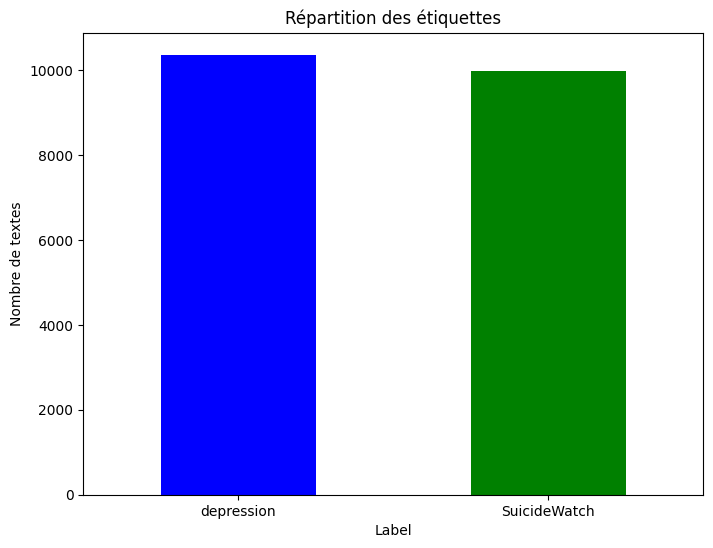

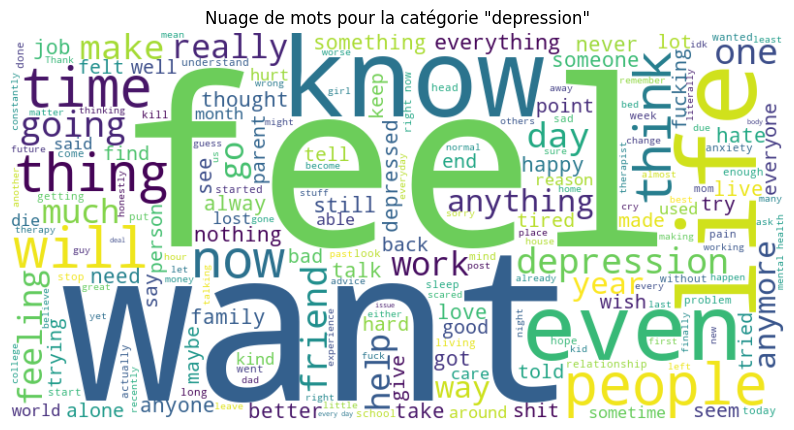

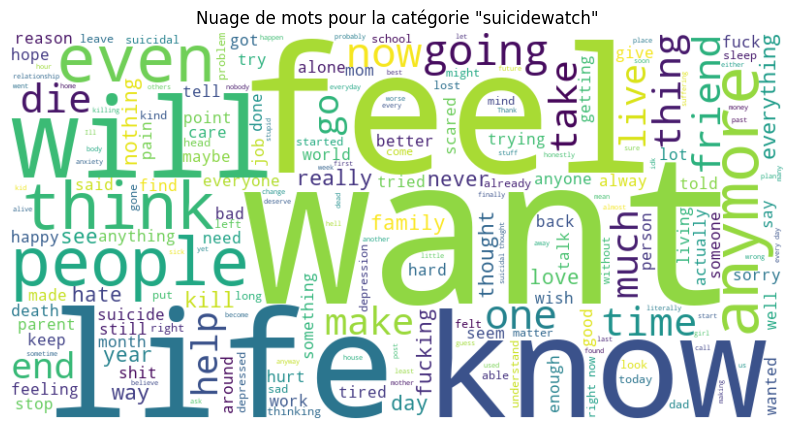

In [6]:
# Visualisation de la répartition des étiquettes (labels)
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Répartition des étiquettes')
plt.xlabel('Label')
plt.ylabel('Nombre de textes')
plt.xticks(rotation=0)
plt.show()

# Créer un nuage de mots pour chaque label
depression_text = ' '.join(df[df['label'] == 'depression']['text'])
suicidewatch_text = ' '.join(df[df['label'] == 'SuicideWatch']['text'])

# Nuage de mots pour 'depression'
wordcloud_depression = WordCloud(width=800, height=400, background_color='white').generate(depression_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_depression, interpolation='bilinear')
plt.title('Nuage de mots pour la catégorie "depression"')
plt.axis('off')
plt.show()

# Nuage de mots pour 'suicidewatch'
wordcloud_suicidewatch = WordCloud(width=800, height=400, background_color='white').generate(suicidewatch_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_suicidewatch, interpolation='bilinear')
plt.title('Nuage de mots pour la catégorie "suicidewatch"')
plt.axis('off')
plt.show()


# **Data traitement**

# Download necessary NLTK resources

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



In [8]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Define function to preprocess text and remove stopwords

In [9]:

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens



## Define function to generate trigrams


In [10]:
from nltk.util import ngrams

In [11]:
def generate_trigrams(tokens):
    return list(ngrams(tokens, 3))

## Define function to construct semantic graph

In [12]:
def construct_graph(keywords):
    G = nx.Graph()
    for i in range(len(keywords)-1):
        G.add_edge(keywords[i], keywords[i+1])
    return G

## Initialize KeyBERT model


In [13]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

# Set parameters

# first 1000 rows

In [14]:
df = pd.read_csv(file_path, nrows=1000)

# 5,5,20

In [19]:
top_n_keywords = 5  # Number of top keywords to extract per sentence
frequency_threshold = 5  # Frequency threshold for common keywords
max_nodes = 20  # Maximum number of nodes to display in the graph

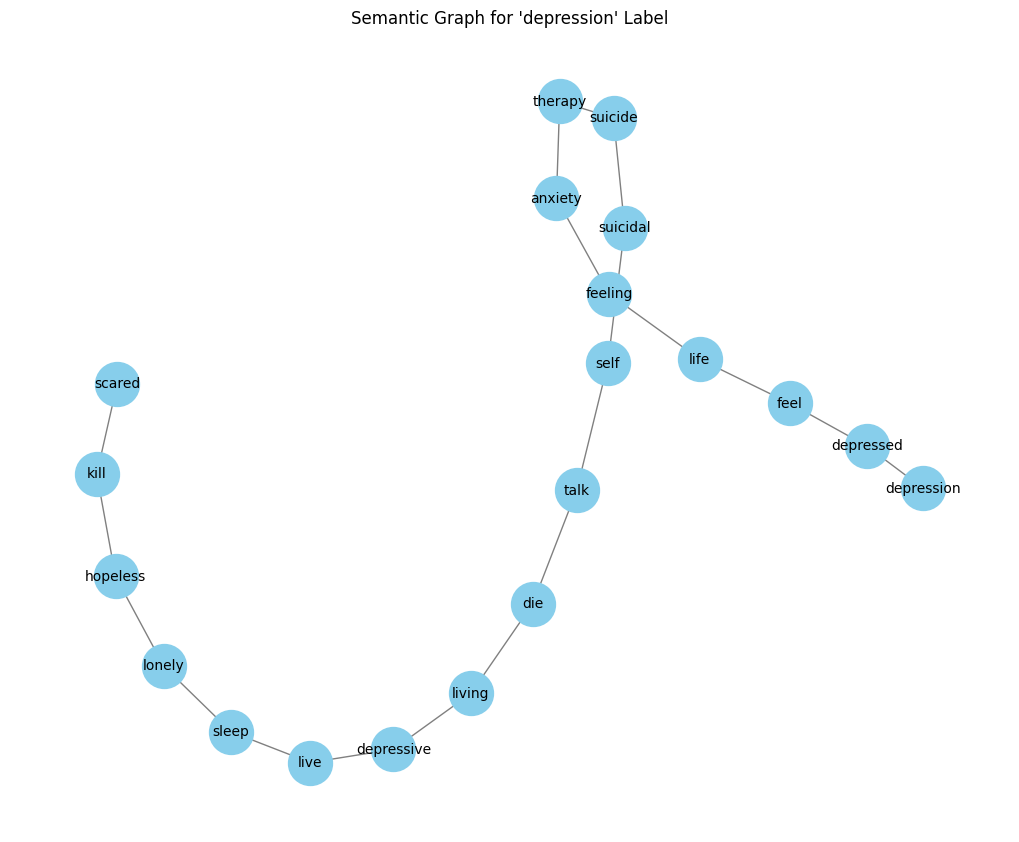

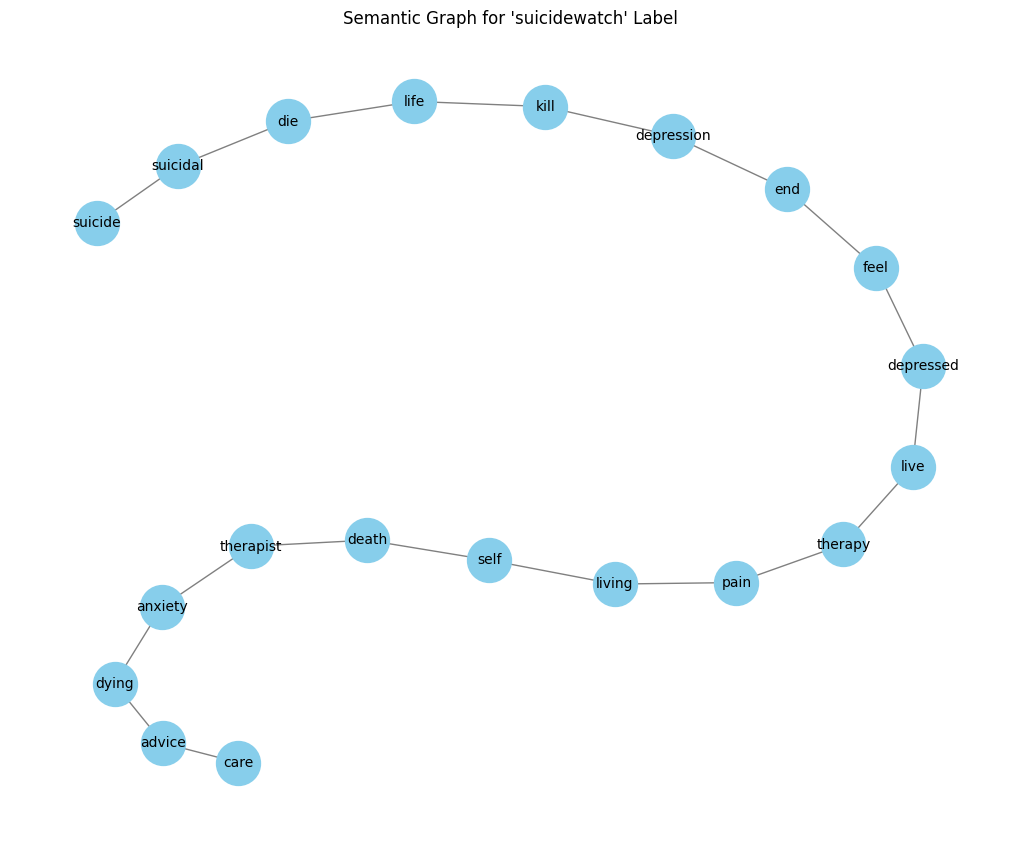

In [20]:
# Iterate over each sentence in the CSV file and generate semantic graphs for 'depression' and 'suicidewatch' labels
depression_keywords = []
suicidewatch_keywords = []
for index, row in df.iterrows():
    text = row['text']
    label = row['label']
    
    # Preprocess text
    filtered_tokens = preprocess_text(text)
    
    # Extract keywords using KeyBERT
    keywords = kw_model.extract_keywords(text, top_n=top_n_keywords)
    
    # Filter out keywords that appear too frequently across all sentences
    common_keywords = set([keyword[0] for keyword in keywords if keyword[1] > frequency_threshold])
    
    # Filter keywords based on label and ensure keyword list is not empty
    if label == 'depression' and keywords:
        depression_keywords.extend([keyword[0] for keyword in keywords if keyword[0] in filtered_tokens and keyword[0] not in common_keywords])
    elif label == 'SuicideWatch' and keywords:
        suicidewatch_keywords.extend([keyword[0] for keyword in keywords if keyword[0] in filtered_tokens and keyword[0] not in common_keywords])

# Select only the top max_nodes frequent keywords
depression_keywords = [keyword for keyword, freq in nltk.FreqDist(depression_keywords).most_common(max_nodes)]
suicidewatch_keywords = [keyword for keyword, freq in nltk.FreqDist(suicidewatch_keywords).most_common(max_nodes)]

# Construct semantic graphs for 'depression' and 'suicidewatch' labels if keywords are available
if depression_keywords:
    G_depression = construct_graph(depression_keywords)
    plt.figure(figsize=(10, 8))
    pos_depression = nx.spring_layout(G_depression)
    nx.draw(G_depression, pos_depression, with_labels=True, font_size=10, node_color='skyblue', node_size=1000, edge_color='gray')  # Decrease node_size here
    plt.title("Semantic Graph for 'depression' Label")
    plt.show()

if suicidewatch_keywords:
    G_suicidewatch = construct_graph(suicidewatch_keywords)
    plt.figure(figsize=(10, 8))
    pos_suicidewatch = nx.spring_layout(G_suicidewatch)
    nx.draw(G_suicidewatch, pos_suicidewatch, with_labels=True, font_size=10, node_color='skyblue', node_size=1000, edge_color='gray')  # Decrease node_size here
    plt.title("Semantic Graph for 'suicidewatch' Label")
    plt.show()

# 30,20,100

In [24]:
top_n_keywords = 30  # Number of top keywords to extract per sentence
frequency_threshold = 20  # Frequency threshold for common keywords
max_nodes = 100  # Maximum number of nodes to display in the graph

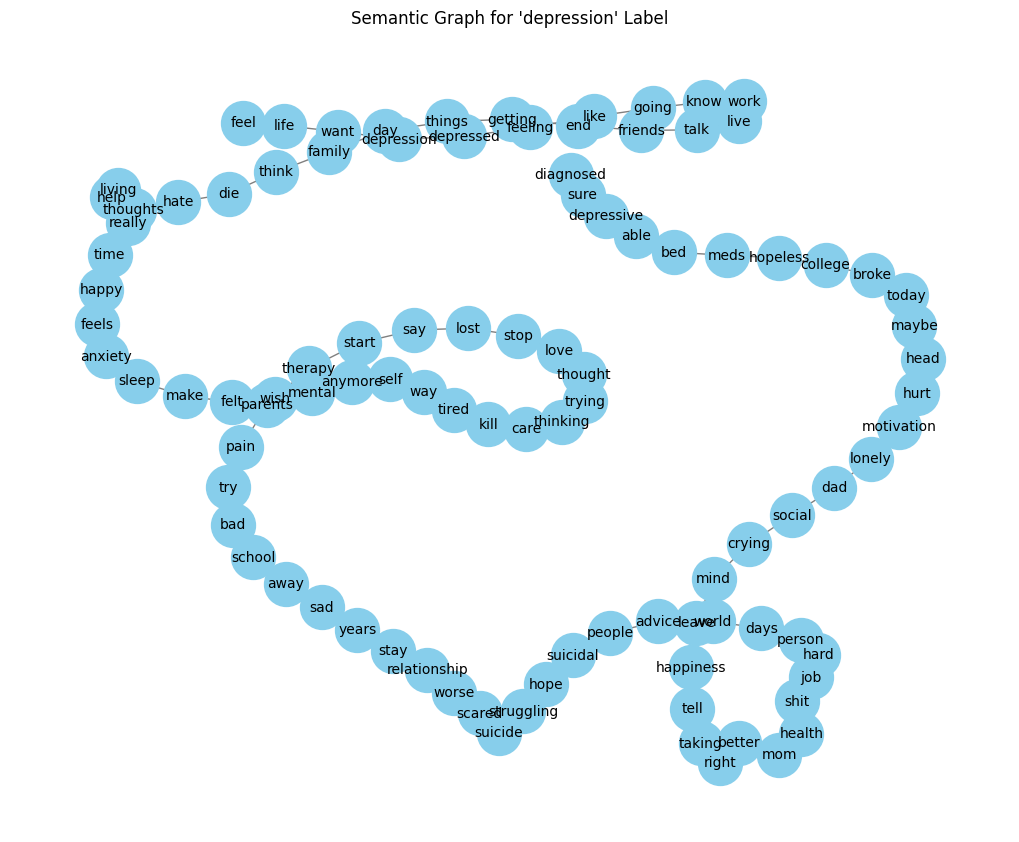

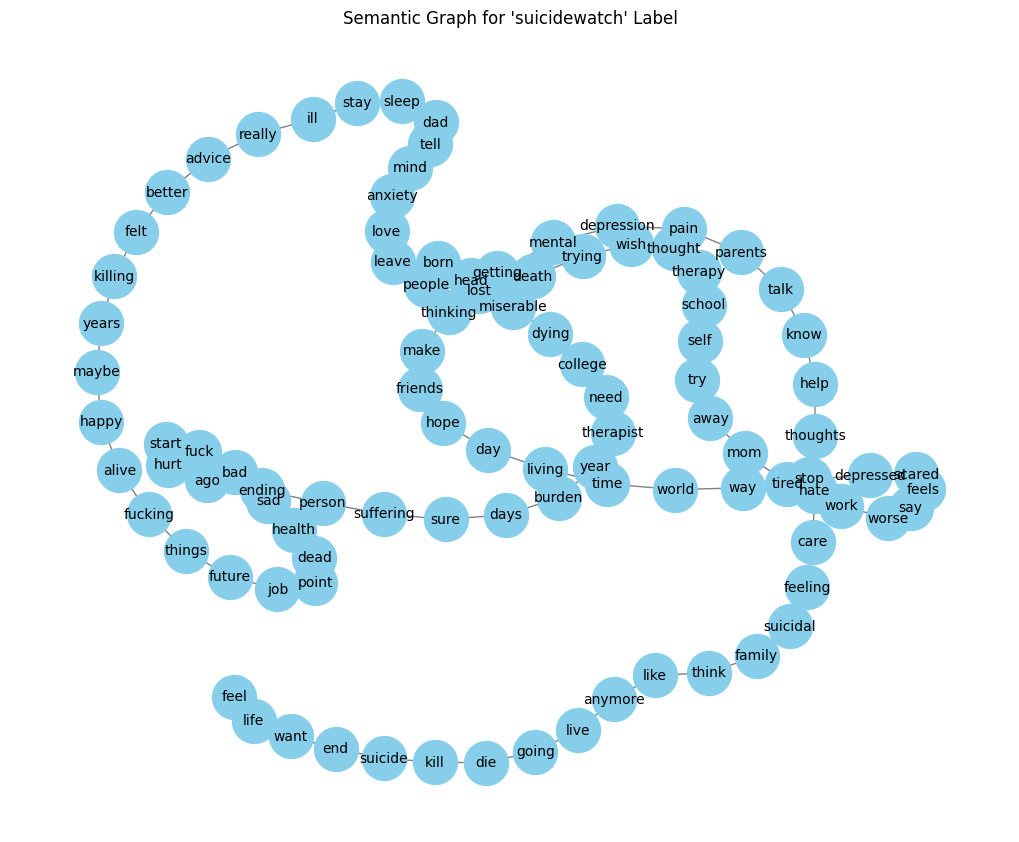

In [25]:
# Iterate over each sentence in the CSV file and generate semantic graphs for 'depression' and 'suicidewatch' labels
depression_keywords = []
suicidewatch_keywords = []
for index, row in df.iterrows():
    text = row['text']
    label = row['label']
    
    # Preprocess text
    filtered_tokens = preprocess_text(text)
    
    # Extract keywords using KeyBERT
    keywords = kw_model.extract_keywords(text, top_n=top_n_keywords)
    
    # Filter out keywords that appear too frequently across all sentences
    common_keywords = set([keyword[0] for keyword in keywords if keyword[1] > frequency_threshold])
    
    # Filter keywords based on label and ensure keyword list is not empty
    if label == 'depression' and keywords:
        depression_keywords.extend([keyword[0] for keyword in keywords if keyword[0] in filtered_tokens and keyword[0] not in common_keywords])
    elif label == 'SuicideWatch' and keywords:
        suicidewatch_keywords.extend([keyword[0] for keyword in keywords if keyword[0] in filtered_tokens and keyword[0] not in common_keywords])

# Select only the top max_nodes frequent keywords
depression_keywords = [keyword for keyword, freq in nltk.FreqDist(depression_keywords).most_common(max_nodes)]
suicidewatch_keywords = [keyword for keyword, freq in nltk.FreqDist(suicidewatch_keywords).most_common(max_nodes)]

# Construct semantic graphs for 'depression' and 'suicidewatch' labels if keywords are available
if depression_keywords:
    G_depression = construct_graph(depression_keywords)
    plt.figure(figsize=(10, 8))
    pos_depression = nx.spring_layout(G_depression)
    nx.draw(G_depression, pos_depression, with_labels=True, font_size=10, node_color='skyblue', node_size=1000, edge_color='gray')  # Decrease node_size here
    plt.title("Semantic Graph for 'depression' Label")
    plt.show()

if suicidewatch_keywords:
    G_suicidewatch = construct_graph(suicidewatch_keywords)
    plt.figure(figsize=(10, 8))
    pos_suicidewatch = nx.spring_layout(G_suicidewatch)
    nx.draw(G_suicidewatch, pos_suicidewatch, with_labels=True, font_size=10, node_color='skyblue', node_size=1000, edge_color='gray')  # Decrease node_size here
    plt.title("Semantic Graph for 'suicidewatch' Label")
    plt.show()

In [ ]:
#